In [71]:
import pandas as pd
import seaborn as sns

In [20]:
covid = pd.read_csv('covid_19_clean_complete.csv')

In [21]:
covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [22]:
covid.isnull().sum()

Province/State    16926
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [23]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24366 entries, 0 to 24365
Data columns (total 8 columns):
Province/State    7440 non-null object
Country/Region    24366 non-null object
Lat               24366 non-null float64
Long              24366 non-null float64
Date              24366 non-null object
Confirmed         24366 non-null int64
Deaths            24366 non-null int64
Recovered         24366 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.5+ MB


In [24]:
# dropping unwanted colums
covid.drop(['Province/State'],axis=1,inplace=True)

In [25]:
covid.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,Albania,41.1533,20.1683,1/22/20,0,0,0
2,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [26]:
covid['Country/Region'].nunique()

185

In [27]:
dummies = pd.get_dummies(covid['Country/Region'],drop_first=True)

In [30]:
covid = pd.concat([covid.drop('Country/Region',axis=1),dummies],axis=1)

In [49]:
covid['Month'] = covid['Date'].apply(lambda date: date.split('/')[1])

In [50]:
covid.drop('Date',axis=1,inplace=True)

In [51]:
# splitting data

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = covid.drop('Deaths',axis=1).values
y = covid['Deaths'].values

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [55]:
# scaling data

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [59]:
X_train = scaler.transform(X_train)

In [60]:
X_test = scaler.transform(X_test)

In [63]:
X_train.shape

(17056, 189)

In [64]:
# creating neural network

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [66]:
model = Sequential()

model.add(Dense(189,activation='relu'))
model.add(Dense(95,activation='relu'))
model.add(Dense(47,activation='relu'))
model.add(Dense(24,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [67]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000)

Train on 17056 samples, validate on 7310 samples
Epoch 1/1000
17056/17056 [==============================] - 1s 79us/sample - loss: 1620058.4319 - val_loss: 1024464.7565
Epoch 2/1000
17056/17056 [==============================] - 1s 47us/sample - loss: 739410.7018 - val_loss: 322342.8461
Epoch 3/1000
17056/17056 [==============================] - 1s 43us/sample - loss: 289604.0492 - val_loss: 243708.4187
Epoch 4/1000
17056/17056 [==============================] - 1s 50us/sample - loss: 234911.6484 - val_loss: 235425.4092
Epoch 5/1000
17056/17056 [==============================] - 1s 45us/sample - loss: 225124.3345 - val_loss: 225229.5981
Epoch 6/1000
17056/17056 [==============================] - 1s 44us/sample - loss: 220376.6285 - val_loss: 216286.6609
Epoch 7/1000
17056/17056 [==============================] - 1s 44us/sample - loss: 210851.6330 - val_loss: 228861.5298
Epoch 8/1000
17056/17056 [==============================] - 1s 45us/sample - loss: 205155.2076 - val_loss: 213446.58

17056/17056 [==============================] - 1s 55us/sample - loss: 5465.0969 - val_loss: 3943.3230
Epoch 71/1000
17056/17056 [==============================] - 1s 57us/sample - loss: 6559.1021 - val_loss: 5324.6826
Epoch 72/1000
17056/17056 [==============================] - 1s 63us/sample - loss: 21035.5237 - val_loss: 7873.2218
Epoch 73/1000
17056/17056 [==============================] - 1s 66us/sample - loss: 4915.0495 - val_loss: 6266.0334
Epoch 74/1000
17056/17056 [==============================] - 1s 58us/sample - loss: 7052.3736 - val_loss: 5514.4972
Epoch 75/1000
17056/17056 [==============================] - 1s 63us/sample - loss: 6429.9531 - val_loss: 13716.5572
Epoch 76/1000
17056/17056 [==============================] - 1s 59us/sample - loss: 7265.0803 - val_loss: 9407.6634
Epoch 77/1000
17056/17056 [==============================] - 1s 63us/sample - loss: 8474.1462 - val_loss: 8731.4503
Epoch 78/1000
17056/17056 [==============================] - 1s 62us/sample - loss: 

17056/17056 [==============================] - 1s 59us/sample - loss: 8608.1059 - val_loss: 3019.1671
Epoch 141/1000
17056/17056 [==============================] - 1s 63us/sample - loss: 4841.5773 - val_loss: 4215.4266
Epoch 142/1000
17056/17056 [==============================] - 1s 58us/sample - loss: 4108.7953 - val_loss: 9227.3203
Epoch 143/1000
17056/17056 [==============================] - 1s 55us/sample - loss: 5265.0687 - val_loss: 2567.4973
Epoch 144/1000
17056/17056 [==============================] - 1s 60us/sample - loss: 8423.6211 - val_loss: 2494.3896
Epoch 145/1000
17056/17056 [==============================] - 1s 54us/sample - loss: 4281.8299 - val_loss: 9957.8888
Epoch 146/1000
17056/17056 [==============================] - 1s 55us/sample - loss: 6137.1698 - val_loss: 4676.3536
Epoch 147/1000
17056/17056 [==============================] - 1s 55us/sample - loss: 5219.9807 - val_loss: 44214.5081
Epoch 148/1000
17056/17056 [==============================] - 1s 57us/sample -

17056/17056 [==============================] - 1s 64us/sample - loss: 4410.8824 - val_loss: 3022.5795
Epoch 211/1000
17056/17056 [==============================] - 1s 60us/sample - loss: 2584.6542 - val_loss: 3923.7227
Epoch 212/1000
17056/17056 [==============================] - 1s 60us/sample - loss: 3666.5798 - val_loss: 5662.1023
Epoch 213/1000
17056/17056 [==============================] - 1s 61us/sample - loss: 5999.1708 - val_loss: 5022.8366
Epoch 214/1000
17056/17056 [==============================] - 1s 60us/sample - loss: 4521.1579 - val_loss: 4050.0568
Epoch 215/1000
17056/17056 [==============================] - 1s 62us/sample - loss: 3805.0706 - val_loss: 2001.3310
Epoch 216/1000
17056/17056 [==============================] - 1s 61us/sample - loss: 3160.6717 - val_loss: 7544.4990
Epoch 217/1000
17056/17056 [==============================] - 1s 61us/sample - loss: 4646.5940 - val_loss: 2278.2079
Epoch 218/1000
17056/17056 [==============================] - 1s 62us/sample - 

17056/17056 [==============================] - 1s 55us/sample - loss: 2930.9688 - val_loss: 2372.7103
Epoch 281/1000
17056/17056 [==============================] - 1s 56us/sample - loss: 2872.0742 - val_loss: 2869.4004
Epoch 282/1000
17056/17056 [==============================] - 1s 54us/sample - loss: 3167.8374 - val_loss: 6250.6806
Epoch 283/1000
17056/17056 [==============================] - 1s 55us/sample - loss: 3967.5388 - val_loss: 4316.3151
Epoch 284/1000
17056/17056 [==============================] - 1s 55us/sample - loss: 2645.3048 - val_loss: 5679.4825
Epoch 285/1000
17056/17056 [==============================] - 1s 52us/sample - loss: 5088.0941 - val_loss: 3724.2357
Epoch 286/1000
17056/17056 [==============================] - 1s 53us/sample - loss: 2716.0821 - val_loss: 2602.3204
Epoch 287/1000
17056/17056 [==============================] - 1s 53us/sample - loss: 5194.7712 - val_loss: 2202.5790
Epoch 288/1000
17056/17056 [==============================] - 1s 54us/sample - 

17056/17056 [==============================] - 1s 61us/sample - loss: 3444.1243 - val_loss: 1985.7765
Epoch 351/1000
17056/17056 [==============================] - 1s 63us/sample - loss: 2568.6886 - val_loss: 5433.5507
Epoch 352/1000
17056/17056 [==============================] - 1s 62us/sample - loss: 4098.2187 - val_loss: 3513.0706
Epoch 353/1000
17056/17056 [==============================] - 1s 61us/sample - loss: 2592.9859 - val_loss: 2599.3398
Epoch 354/1000
17056/17056 [==============================] - 1s 61us/sample - loss: 2876.1021 - val_loss: 3379.2758
Epoch 355/1000
17056/17056 [==============================] - 1s 64us/sample - loss: 2984.4821 - val_loss: 5109.5503
Epoch 356/1000
17056/17056 [==============================] - 1s 61us/sample - loss: 3047.3311 - val_loss: 3690.5260
Epoch 357/1000
17056/17056 [==============================] - 1s 63us/sample - loss: 3259.8466 - val_loss: 2819.6569
Epoch 358/1000
17056/17056 [==============================] - 1s 62us/sample - 

17056/17056 [==============================] - 1s 53us/sample - loss: 2183.8413 - val_loss: 1911.3942
Epoch 421/1000
17056/17056 [==============================] - 1s 52us/sample - loss: 2293.0182 - val_loss: 3645.5808
Epoch 422/1000
17056/17056 [==============================] - 1s 52us/sample - loss: 3646.5709 - val_loss: 1692.6312
Epoch 423/1000
17056/17056 [==============================] - 1s 56us/sample - loss: 2709.6573 - val_loss: 3603.3644
Epoch 424/1000
17056/17056 [==============================] - 1s 53us/sample - loss: 2776.9532 - val_loss: 2878.4786
Epoch 425/1000
17056/17056 [==============================] - 1s 54us/sample - loss: 1767.6884 - val_loss: 2340.3743
Epoch 426/1000
17056/17056 [==============================] - 1s 54us/sample - loss: 4132.7672 - val_loss: 5073.4947
Epoch 427/1000
17056/17056 [==============================] - 1s 57us/sample - loss: 2201.0514 - val_loss: 3612.1394
Epoch 428/1000
17056/17056 [==============================] - 1s 54us/sample - 

17056/17056 [==============================] - 1s 59us/sample - loss: 1364.1111 - val_loss: 1802.7042
Epoch 491/1000
17056/17056 [==============================] - 1s 62us/sample - loss: 1929.6612 - val_loss: 5772.9745
Epoch 492/1000
17056/17056 [==============================] - 1s 58us/sample - loss: 2804.4813 - val_loss: 3407.5253
Epoch 493/1000
17056/17056 [==============================] - 1s 59us/sample - loss: 3866.1297 - val_loss: 1473.4407
Epoch 494/1000
17056/17056 [==============================] - 1s 60us/sample - loss: 2101.0696 - val_loss: 1609.3918
Epoch 495/1000
17056/17056 [==============================] - 1s 60us/sample - loss: 2618.9486 - val_loss: 2111.3998
Epoch 496/1000
17056/17056 [==============================] - 1s 60us/sample - loss: 1716.6630 - val_loss: 2504.6948
Epoch 497/1000
17056/17056 [==============================] - 1s 62us/sample - loss: 2716.2418 - val_loss: 2306.3598
Epoch 498/1000
17056/17056 [==============================] - 1s 61us/sample - 

17056/17056 [==============================] - 1s 59us/sample - loss: 1548.4509 - val_loss: 2035.1507
Epoch 561/1000
17056/17056 [==============================] - 1s 66us/sample - loss: 2060.0109 - val_loss: 1299.3557
Epoch 562/1000
17056/17056 [==============================] - 1s 60us/sample - loss: 2415.6348 - val_loss: 3045.8370
Epoch 563/1000
17056/17056 [==============================] - 1s 81us/sample - loss: 6236.1167 - val_loss: 3294.1242
Epoch 564/1000
17056/17056 [==============================] - 3s 149us/sample - loss: 1646.0260 - val_loss: 2279.4542
Epoch 565/1000
17056/17056 [==============================] - 2s 113us/sample - loss: 1837.7950 - val_loss: 1317.5060
Epoch 566/1000
17056/17056 [==============================] - 2s 114us/sample - loss: 2397.6807 - val_loss: 4135.7537
Epoch 567/1000
17056/17056 [==============================] - 1s 71us/sample - loss: 1839.1846 - val_loss: 1881.7717
Epoch 568/1000
17056/17056 [==============================] - 1s 56us/sample

17056/17056 [==============================] - 1s 88us/sample - loss: 1636.4810 - val_loss: 2003.6472
Epoch 631/1000
17056/17056 [==============================] - 2s 89us/sample - loss: 1493.3602 - val_loss: 1480.9524
Epoch 632/1000
17056/17056 [==============================] - 2s 94us/sample - loss: 1362.1023 - val_loss: 3998.7314
Epoch 633/1000
17056/17056 [==============================] - 2s 93us/sample - loss: 2080.9636 - val_loss: 1630.4227
Epoch 634/1000
17056/17056 [==============================] - 2s 103us/sample - loss: 1023.9330 - val_loss: 984.3841
Epoch 635/1000
17056/17056 [==============================] - 2s 96us/sample - loss: 3230.0960 - val_loss: 1568.7135
Epoch 636/1000
17056/17056 [==============================] - 2s 90us/sample - loss: 2156.4058 - val_loss: 2138.2717
Epoch 637/1000
17056/17056 [==============================] - 2s 97us/sample - loss: 1420.0886 - val_loss: 7845.6723
Epoch 638/1000
17056/17056 [==============================] - 2s 92us/sample - 

Epoch 700/1000
17056/17056 [==============================] - 1s 87us/sample - loss: 1896.5201 - val_loss: 981.6078
Epoch 701/1000
17056/17056 [==============================] - 1s 88us/sample - loss: 1612.2518 - val_loss: 1427.1070
Epoch 702/1000
17056/17056 [==============================] - 2s 90us/sample - loss: 1585.6213 - val_loss: 2392.0600
Epoch 703/1000
17056/17056 [==============================] - 2s 94us/sample - loss: 1678.9113 - val_loss: 957.7613
Epoch 704/1000
17056/17056 [==============================] - 2s 101us/sample - loss: 1777.6675 - val_loss: 4023.3001
Epoch 705/1000
17056/17056 [==============================] - 2s 100us/sample - loss: 1801.2345 - val_loss: 2302.4941
Epoch 706/1000
17056/17056 [==============================] - 2s 109us/sample - loss: 1881.5327 - val_loss: 1212.3279
Epoch 707/1000
17056/17056 [==============================] - 2s 119us/sample - loss: 1333.1274 - val_loss: 1132.3954
Epoch 708/1000
17056/17056 [==============================] - 

17056/17056 [==============================] - 2s 92us/sample - loss: 1232.2183 - val_loss: 1618.4735
Epoch 771/1000
17056/17056 [==============================] - 2s 91us/sample - loss: 1736.5750 - val_loss: 4248.6798
Epoch 772/1000
17056/17056 [==============================] - 2s 97us/sample - loss: 1054.3144 - val_loss: 2099.7097
Epoch 773/1000
17056/17056 [==============================] - 2s 97us/sample - loss: 1718.4814 - val_loss: 2801.6649
Epoch 774/1000
17056/17056 [==============================] - 1s 86us/sample - loss: 1642.5623 - val_loss: 1406.3915
Epoch 775/1000
17056/17056 [==============================] - 1s 61us/sample - loss: 3025.4138 - val_loss: 1654.8161
Epoch 776/1000
17056/17056 [==============================] - 1s 58us/sample - loss: 1629.8839 - val_loss: 2329.0876
Epoch 777/1000
17056/17056 [==============================] - 1s 60us/sample - loss: 2069.8590 - val_loss: 1073.7974
Epoch 778/1000
17056/17056 [==============================] - 1s 58us/sample - 

17056/17056 [==============================] - 1s 63us/sample - loss: 1202.7239 - val_loss: 1215.5029
Epoch 841/1000
17056/17056 [==============================] - 1s 62us/sample - loss: 1373.6626 - val_loss: 819.2942
Epoch 842/1000
17056/17056 [==============================] - 1s 63us/sample - loss: 1867.3134 - val_loss: 1629.3788
Epoch 843/1000
17056/17056 [==============================] - 1s 61us/sample - loss: 1704.6581 - val_loss: 1869.5036
Epoch 844/1000
17056/17056 [==============================] - 1s 62us/sample - loss: 1233.7557 - val_loss: 1385.1090
Epoch 845/1000
17056/17056 [==============================] - 1s 62us/sample - loss: 1039.1844 - val_loss: 5066.3369
Epoch 846/1000
17056/17056 [==============================] - 1s 61us/sample - loss: 1719.0817 - val_loss: 3018.1877
Epoch 847/1000
17056/17056 [==============================] - 1s 64us/sample - loss: 1359.7659 - val_loss: 2141.7114
Epoch 848/1000
17056/17056 [==============================] - 1s 60us/sample - l

17056/17056 [==============================] - 1s 75us/sample - loss: 1505.1125 - val_loss: 4192.5812
Epoch 911/1000
17056/17056 [==============================] - 1s 70us/sample - loss: 1582.3527 - val_loss: 1715.0823
Epoch 912/1000
17056/17056 [==============================] - 1s 61us/sample - loss: 1006.3509 - val_loss: 1496.5577
Epoch 913/1000
17056/17056 [==============================] - 1s 67us/sample - loss: 1847.3005 - val_loss: 1945.8657
Epoch 914/1000
17056/17056 [==============================] - 1s 61us/sample - loss: 1105.6185 - val_loss: 2879.4945
Epoch 915/1000
17056/17056 [==============================] - 1s 64us/sample - loss: 2076.9169 - val_loss: 1388.9617
Epoch 916/1000
17056/17056 [==============================] - 1s 68us/sample - loss: 1607.6700 - val_loss: 2527.3778
Epoch 917/1000
17056/17056 [==============================] - 1s 60us/sample - loss: 1207.8517 - val_loss: 1035.8917
Epoch 918/1000
17056/17056 [==============================] - 1s 60us/sample - 

17056/17056 [==============================] - 1s 60us/sample - loss: 1545.8722 - val_loss: 2335.4874
Epoch 981/1000
17056/17056 [==============================] - 1s 62us/sample - loss: 1607.2104 - val_loss: 2738.6251
Epoch 982/1000
17056/17056 [==============================] - 1s 60us/sample - loss: 2400.2216 - val_loss: 5779.8207
Epoch 983/1000
17056/17056 [==============================] - 1s 61us/sample - loss: 2423.0094 - val_loss: 3907.9853
Epoch 984/1000
17056/17056 [==============================] - 1s 59us/sample - loss: 1296.1050 - val_loss: 1020.4962
Epoch 985/1000
17056/17056 [==============================] - 1s 60us/sample - loss: 1785.5224 - val_loss: 1902.0481
Epoch 986/1000
17056/17056 [==============================] - 1s 59us/sample - loss: 974.9282 - val_loss: 821.4984
Epoch 987/1000
17056/17056 [==============================] - 1s 58us/sample - loss: 1259.7353 - val_loss: 971.6140
Epoch 988/1000
17056/17056 [==============================] - 1s 60us/sample - los

In [68]:
losses = pd.DataFrame(model.history.history)

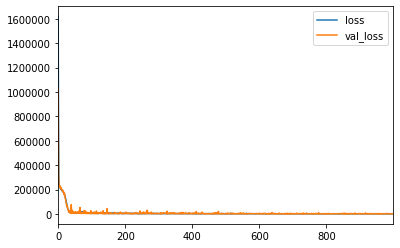

In [69]:
losses.plot()

In [70]:
prediction = model.predict(X_test)

In [74]:
prediction

array([[  4.78075 ],
       [-30.769932],
       [ -1.302534],
       ...,
       [-50.627415],
       [ -7.145893],
       [ 14.648792]], dtype=float32)

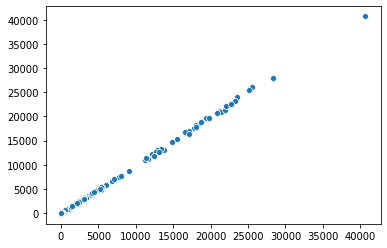

In [75]:
sns.scatterplot(y_test,prediction[:,0])